In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb

%matplotlib inline

In [2]:
tenda_sp_zn = pd.read_csv('tenda_propostas_SP_ZN.csv',sep=';',decimal = ',')

In [3]:
tenda_sp_zn.dtypes

Chave unica                       object
Preco Venda                      float64
Renda_Bruta_Familiar_Proposta    float64
FGTS_familiar_Proposta           float64
dtype: object

In [4]:
tenda_sp_zn.head()

,Chave unica,Preco Venda,Renda_Bruta_Familiar_Proposta,FGTS_familiar_Proposta
0,PRO17072601809347809,200000.0,3284.1,8249.3
1,PRO249635N6G4C9353371,200000.0,1769.0,7466.7
2,PRO249637C0N0X1353323,196003.0,2499.4,41595.4
3,PRO249639D4J2J4353343,196000.0,2703.3,25963.7
4,PRO249644F3W1C2353321,200000.4,4901.8,26049.1


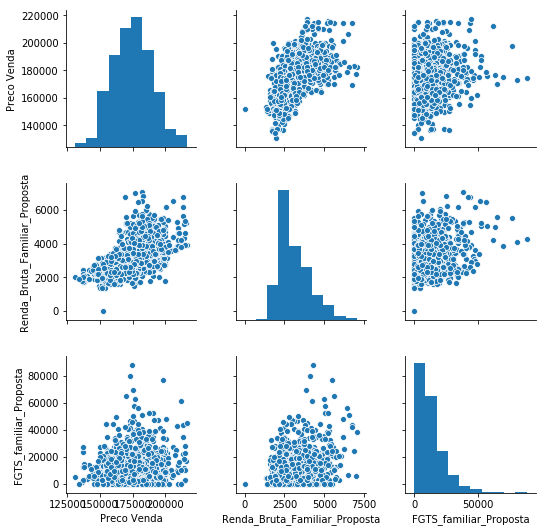

In [5]:
sb.pairplot(tenda_sp_zn)

In [6]:
tenda_drop_sp_zn = tenda_sp_zn.drop(['Chave unica'],axis = 1)
tenda_drop_sp_zn

,Preco Venda,Renda_Bruta_Familiar_Proposta,FGTS_familiar_Proposta
0,200000.0,3284.1,8249.3
1,200000.0,1769.0,7466.7
2,196003.0,2499.4,41595.4
3,196000.0,2703.3,25963.7
4,200000.4,4901.8,26049.1
5,196662.2,4215.6,3602.3
6,200000.0,3284.2,8249.3
7,180571.9,2856.7,8796.1
8,196000.5,4276.0,6715.7
9,196005.0,3857.1,0.0


K_MEANS (RS)

In [7]:
from sklearn.cluster import KMeans

In [8]:
sb.set_style('darkgrid')

In [9]:
wcss = []

1 404295862775.3722
2 229632014781.64978
3 163004939552.15903
4 122203041900.93459
5 103254292620.42941
6 87853872187.61517
7 76053283619.41467
8 67468913982.0291
9 60423619854.87314


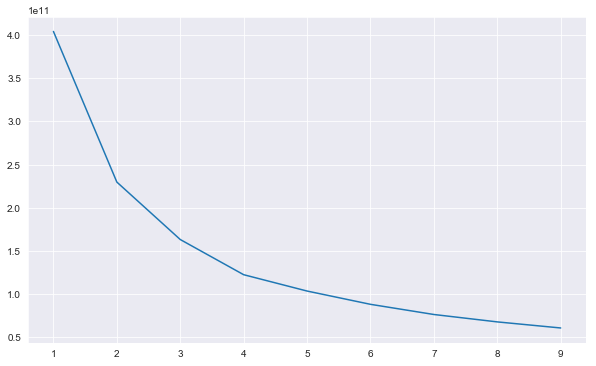

In [10]:
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(tenda_drop_sp_zn)
    print (i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)
pl.figure(figsize=(10, 6))    
pl.plot(range(1, 10), wcss)    

In [21]:
kmeans = KMeans(n_clusters=4,random_state=0)

In [22]:
kmeans.fit(tenda_drop_sp_zn)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [23]:
kmeans.labels_

array([1, 1, 2, ..., 0, 1, 3])

CLASSES CRIADAS 

In [24]:
tenda_sp_zn['Kclasses'] = kmeans.labels_

In [25]:
tenda_sp_zn. head(20)

,Chave unica,Preco Venda,Renda_Bruta_Familiar_Proposta,FGTS_familiar_Proposta,Kclasses
0,PRO17072601809347809,200000.0,3284.1,8249.3,1
1,PRO249635N6G4C9353371,200000.0,1769.0,7466.7,1
2,PRO249637C0N0X1353323,196003.0,2499.4,41595.4,2
3,PRO249639D4J2J4353343,196000.0,2703.3,25963.7,1
4,PRO249644F3W1C2353321,200000.4,4901.8,26049.1,1
5,PRO249675C9B1G1353394,196662.2,4215.6,3602.3,1
6,PRO249681L3Q7V8347809,200000.0,3284.2,8249.3,1
7,PRO249690R6W1B1353383,180571.9,2856.7,8796.1,3
8,PRO249706J5Y2T3353405,196000.5,4276.0,6715.7,1
9,PRO249783T2N1C5353426,196005.0,3857.1,0.0,1


In [26]:
tenda_sp_zn['Kclasses'] = kmeans.labels_

In [27]:
tenda_sp_zn.Kclasses.value_counts()

3    422
0    344
1    258
2    124
Name: Kclasses, dtype: int64

PERFIL DOS CLUSTER'S GERADOS

In [28]:
tenda_sp_zn.describe().round(2)

,Preco Venda,Renda_Bruta_Familiar_Proposta,FGTS_familiar_Proposta,Kclasses
count,1148.00,1148.00,1148.00,1148.00
mean,175006.31,3110.54,12500.32,1.54
std,15049.08,992.29,11181.31,1.26
min,130693.80,1.00,0.00,0.00
25%,164405.97,2380.35,4602.42,0.00
50%,175057.10,2843.35,10043.25,1.00
75%,185341.82,3689.08,17166.30,3.00
max,216900.00,7038.80,87721.50,3.00


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


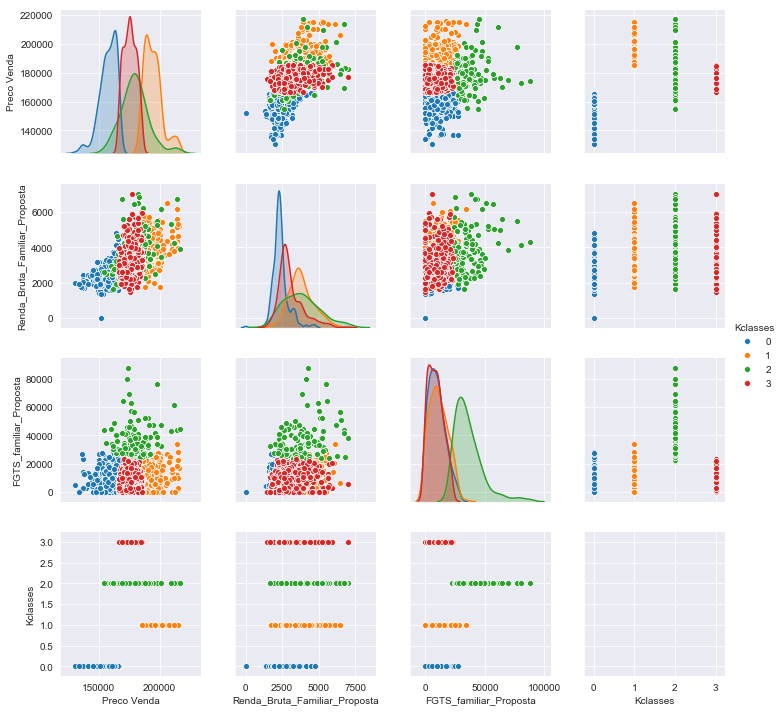

In [29]:
sb.pairplot(tenda_sp_zn,hue='Kclasses')

EXPORTANDO DADOS

In [30]:
tenda_sp_zn.to_csv('clustertenda_SP_ZN.csv',sep=';',decimal=',')